In [1]:
%load_ext autoreload

from PFMD import DiscretePeierls
from matplotlib import pyplot as plt
import jax.numpy as jnp

In [2]:
# def Gamma(u, gamma_c):
#     return -jnp.cos(2*jnp.pi*u[0])*gamma_c

In [3]:
# nl = 30
# lspan = jnp.arange(-nl//2, nl//2)
# # part1 = (np.arctan(lspan + 3.5)/(2*np.pi))+(np.arctan(lspan - 3.5)/(2*np.pi))+0.5

# # # 拼接零数组
# # u_init = np.concatenate([part1, np.zeros(nl)])  # 形状 (2*NL,)
# uzinit = jnp.arctan(lspan)/(jnp.pi)+0.5
# u_init = jnp.c_[uzinit, jnp.zeros(nl)]

# # b = 1.0                # 单位: b (基本长度单位)
# # a = np.sqrt(2) * b / 2  # 根据b计算a，单位: b
# # nu = 0.297039 
# # κs= 1.0           # 螺旋位错相关刚度
# # κe= 124.446 / 72.732  # 刃型位错相关刚度
# # βs = 0.5 * np.sqrt(3) / 4  # 螺旋位错非线性项系数 (单位: 0.5*μ*λ)
# # βe = np.sqrt(3) / 4        # 刃型位错非线性项系数 (单位: μ*λ)
# # λ= np.sqrt(3) / 4
# # gamma =λ / 2

# # ωr_se = np.array([0*βs, 0*βe]) / λ**2  # 弹性系数项，形状 (2,)
# # ωs_se = np.array([κs, 0*κe]) / λ     # 非线性系数项，形状 (2,)

# params_test = {
#     'omega_r': (0, 0),
#     'omega_s': (1, 0),
#     'uz_bound': (0.0, 1.0),
#     'uy_bound': (0.0, 0.0),
#     'sigma': (0.0, 0.0)
# }

# peierls = DiscretePeierls(u_init, Gamma, 1/(8*jnp.pi), params_test)

# tend = 4
# nt = 5
# t_span = (0, tend)  
# t_eval = jnp.linspace(0, tend, nt) 
# t_result, u_result = peierls.run(t_span, t_eval)

# # # 输出结果
# # print("Time points:", t_result)
# # print("Solution shape:", u_result.shape)  # (nl, 2, time)


In [4]:
# plt.scatter(lspan, uzinit)
# for i in range(5):
#     plt.scatter(lspan, u_result[i, :, 0], label=f't={t_result[i]:.2f}')
# plt.legend()

In [5]:
def Gamma(u, gamma_c):
    p = 2*jnp.pi/jnp.sqrt(3)
    q = 2*jnp.pi
    """
    Gamma surface
    """
    term = gamma_c[15] 
    
    term += gamma_c[0] * (
        jnp.cos(2.0 * p * u[1]) + 
        jnp.cos(1.0 * p * u[1] + 1.0 * q * u[0]) + 
        jnp.cos(1.0 * p * u[1] - 1.0 * q * u[0])
    )
    
    term += gamma_c[1] * (
        jnp.cos(2.0 * q * u[0]) + 
        jnp.cos(3.0 * p * u[1] + 1.0 * q * u[0]) + 
        jnp.cos(3.0 * p * u[1] - 1.0 * q * u[0])
    )
    
    term += gamma_c[2] * (
        jnp.cos(4.0 * p * u[1]) + 
        jnp.cos(2.0 * p * u[1] + 2.0 * q * u[0]) + 
        jnp.cos(2.0 * p * u[1] - 2.0 * q * u[0])
    )
    
    term += gamma_c[3] * (
        jnp.cos(5.0 * p * u[1] + 1.0 * q * u[0]) + 
        jnp.cos(4.0 * p * u[1] + 2.0 * q * u[0]) + 
        jnp.cos(1.0 * p * u[1] + 3.0 * q * u[0]) + 
        jnp.cos(1.0 * p * u[1] - 3.0 * q * u[0]) + 
        jnp.cos(4.0 * p * u[1] - 2.0 * q * u[0]) + 
        jnp.cos(5.0 * p * u[1] - 1.0 * q * u[0])
    )
    
    term += gamma_c[4] * (
        jnp.cos(6.0 * p * u[1]) + 
        jnp.cos(3.0 * p * u[1] + 3.0 * q * u[0]) + 
        jnp.cos(3.0 * p * u[1] - 3.0 * q * u[0])
    )
    
    term += gamma_c[5] * (
        jnp.cos(4.0 * q * u[0]) + 
        jnp.cos(6.0 * p * u[1] + 2.0 * q * u[0]) + 
        jnp.cos(6.0 * p * u[1] - 2.0 * q * u[0])
    )
    
    term += gamma_c[6] * (
        jnp.cos(8.0 * p * u[1]) + 
        jnp.cos(4.0 * p * u[1] + 4.0 * q * u[0]) + 
        jnp.cos(4.0 * p * u[1] - 4.0 * q * u[0])
    )
    
    term += gamma_c[7] * (
        jnp.cos(6.0 * q * u[0]) + 
        jnp.cos(9.0 * p * u[1] + 3.0 * q * u[0]) + 
        jnp.cos(9.0 * p * u[1] - 3.0 * q * u[0])
    )
    
    term += gamma_c[8] * (
        jnp.cos(10.0 * p * u[1]) + 
        jnp.cos(5.0 * p * u[1] + 5.0 * q * u[0]) + 
        jnp.cos(5.0 * p * u[1] - 5.0 * q * u[0])
    )
    
    term += gamma_c[9] * (
        jnp.sin(2.0 * p * u[1]) - 
        jnp.sin(1.0 * p * u[1] + 1.0 * q * u[0]) - 
        jnp.sin(1.0 * p * u[1] - 1.0 * q * u[0])
    )
    
    term += gamma_c[10] * (
        jnp.sin(4.0 * p * u[1]) - 
        jnp.sin(2.0 * p * u[1] + 2.0 * q * u[0]) - 
        jnp.sin(2.0 * p * u[1] - 2.0 * q * u[0])
    )
    
    term += gamma_c[11] * (
        jnp.sin(5.0 * p * u[1] + 1.0 * q * u[0]) - 
        jnp.sin(4.0 * p * u[1] + 2.0 * q * u[0]) - 
        jnp.sin(1.0 * p * u[1] + 3.0 * q * u[0]) - 
        jnp.sin(1.0 * p * u[1] - 3.0 * q * u[0]) - 
        jnp.sin(4.0 * p * u[1] - 2.0 * q * u[0]) + 
        jnp.sin(5.0 * p * u[1] - 1.0 * q * u[0])
    )
    
    term += gamma_c[12] * (
        jnp.sin(6.0 * p * u[1]) - 
        jnp.sin(3.0 * p * u[1] + 3.0 * q * u[0]) - 
        jnp.sin(3.0 * p * u[1] - 3.0 * q * u[0])
    )
    
    term += gamma_c[13] * (
        jnp.sin(8.0 * p * u[1]) - 
        jnp.sin(4.0 * p * u[1] + 4.0 * q * u[0]) - 
        jnp.sin(4.0 * p * u[1] - 4.0 * q * u[0])
    )
    
    term += gamma_c[14] * (
        jnp.sin(10.0 * p * u[1]) - 
        jnp.sin(5.0 * p * u[1] + 5.0 * q * u[0]) - 
        jnp.sin(5.0 * p * u[1] - 5.0 * q * u[0])
    )
    
    return term

In [6]:
c = [
    -0.0019125519595932596,
    0.0003005935369634915,
    -0.004239113307857148,
    0.000025312895300520926,
    -0.000016013823539506667,
    -0.0007614840227797769,
    0.00020200193876531548,
    -0.000027877026670403876,
    4.032454755765513e-6,
    0.0035967678463422782,
    -0.00695607350257013,
    -0.0004427695369179309,
    2.4014461498135325e-7,
    -0.00014243187185675744,
    -0.000057645719547335114,
    0.01919935925806344
]

In [7]:
nl = 50
lspan = jnp.arange(-nl//2, nl//2)
# part1 = (np.arctan(lspan + 3.5)/(2*np.pi))+(np.arctan(lspan - 3.5)/(2*np.pi))+0.5

# # 拼接零数组
# u_init = np.concatenate([part1, np.zeros(nl)])  # 形状 (2*NL,)
uzinit = jnp.arctan(lspan)/(jnp.pi)+0.5
u_init = jnp.c_[uzinit, jnp.zeros(nl)]

b = 1.0                # 单位: b (基本长度单位)
a = jnp.sqrt(2) * b / 2  # 根据b计算a，单位: b
nu = 0.297039 
κs= 1.0           # 螺旋位错相关刚度
κe= 124.446 / 72.732  # 刃型位错相关刚度
βs = 0.5 * jnp.sqrt(3) / 4  # 螺旋位错非线性项系数 (单位: 0.5*μ*λ)
βe = jnp.sqrt(3) / 4        # 刃型位错非线性项系数 (单位: μ*λ)
λ= jnp.sqrt(3) / 4
gamma =λ / 2

ωr_se = jnp.array([βs, βe]) / λ**2  # 弹性系数项，形状 (2,)
ωs_se = jnp.array([κs, κe]) / λ     # 非线性系数项，形状 (2,)

params_test = {
    'omega_r': (ωr_se[0], ωr_se[1]),
    'omega_s': (ωs_se[0], ωs_se[1]),
    'uz_bound': (0.0, 1.0),
    'uy_bound': (0.0, 0.0),
    'sigma': (0.0, 0.0)
}


peierls = DiscretePeierls(u_init, Gamma, c, params_test)
t_eval = jnp.linspace(0, 5, 5) 
t_result, u_result = peierls.run(t_eval)

# 输出结果
print("Time points:", t_result)
print("Solution shape:", u_result.shape)  # (nl, 2, time)


Time points: [0.   1.25 2.5  3.75 5.  ]
Solution shape: (5, 50, 2)


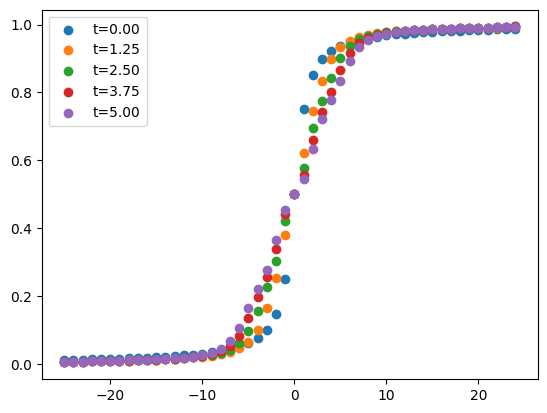

In [8]:
for i in range(5):
    plt.scatter(lspan, u_result[i, :, 0], label=f't={t_result[i]:.2f}')
plt.legend()

In [9]:
# np.hstack([Gamma(utest[l], c) for l in range(utest.shape[0])])

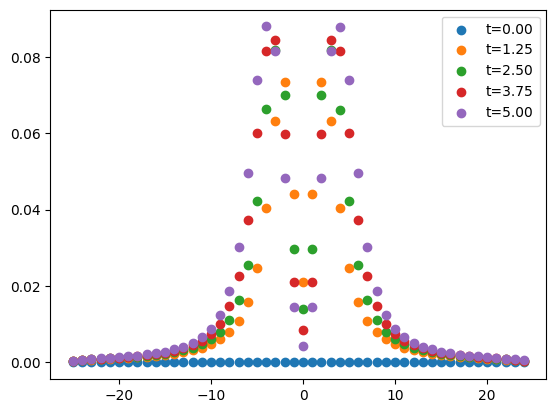

In [10]:
for i in range(5):
    plt.scatter(lspan, u_result[i, :, 1], label=f't={t_result[i]:.2f}')
plt.legend()